In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset=pd.read_csv('micro_credit_defaulter.csv')

In [3]:
df=pd.DataFrame(dataset)

In [4]:
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#droping unnamed column as it is just an index
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
df.shape

(209593, 36)

There are 209593 rows and 36 columns after we drop the unnamed column as it is just index of the data

In [7]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

We can observe that only 3 variables have Object type data and rest have float and integer type data

In [10]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

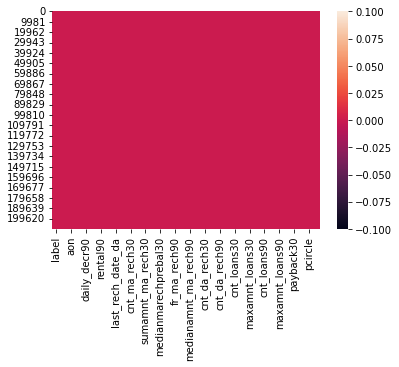

In [11]:
sns.heatmap(df.isnull())

We can see that there is no missing values present in the data

In [12]:
Obj_columns=df.select_dtypes(include=[object])
Obj_columns

,msisdn,pcircle,pdate
0,21408I70789,UPW,2016-07-20
1,76462I70374,UPW,2016-08-10
2,17943I70372,UPW,2016-08-19
3,55773I70781,UPW,2016-06-06
4,03813I82730,UPW,2016-06-22
...,...,...,...
209588,22758I85348,UPW,2016-06-17
209589,95583I84455,UPW,2016-06-12
209590,28556I85350,UPW,2016-07-29
209591,59712I82733,UPW,2016-07-25


In [13]:
df['label'].unique()

array([0, 1], dtype=int64)

In [14]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

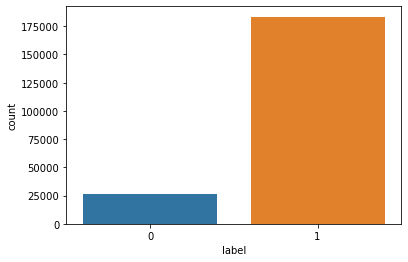

In [15]:
sns.countplot(df['label'])

The dataset is imbalanced. Label '1' has approximately 87.5% records, while, label '0' has approximately 12.5% records

In [16]:
df['msisdn'].nunique()

186243

msidn is a mobile number of user and mobile number is unique for every customers. There are only 186243 unique number out of 209593 so rest of the data is duplicates entry so we have to remove those duplicate entries

In [17]:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 36)

Hence after removing the duplicates we can see that we have only 186243 rows and 34 columns

In [18]:
df.describe(include=['object','datetime'])

,msisdn,pcircle,pdate
count,186243,186243,186243
unique,186243,1,82
top,21408I70789,UPW,2016-07-05
freq,1,186243,2825


We can see that in 'msisdn' variable there are 186243 unique values and is object type, this variable consists data of mobile number of user, Hence this variable has nothing to do with deciding target varible and we can drop off this varible

The variable 'pdate' is about date when the loan was issued even this data has no impact on the target variable hence this column can also be dropped

In [19]:
df.drop(['pdate'],axis=1,inplace=True)

In [20]:
df['pcircle'].value_counts()

UPW    186243
Name: pcircle, dtype: int64

There is only one unique value in the pcircle columns, i.e, UPW which means telecom circle, This variable doesn't make any impact on target variable as it have only one unique value in it so we can drop this variable

In [21]:
df.drop(['pcircle'],axis=1,inplace=True)

In [22]:
# Droping msisdn variable as it has no impact on deciding the target variable
df.drop(['msisdn'],axis=1,inplace=True)

In [23]:
df.shape

(186243, 33)

hence we have have 186243 rows and 33 columns in our dataset

<AxesSubplot:xlabel='daily_decr30', ylabel='label'>

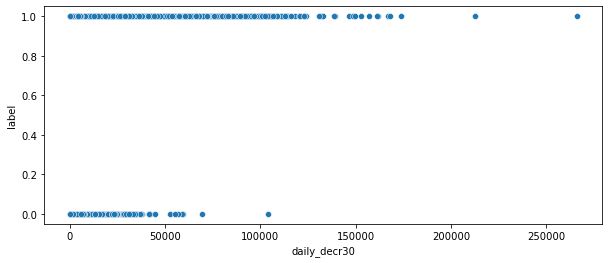

In [24]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='daily_decr30', y='label', data=df)

From the above plot we can observe that the label is success in most of the cases for those customers whose daily amount spent from main account averaged for 30 days is higher

In [25]:
pd.set_option('display.max_columns', None)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,186243.0,0.861149,0.345792,0.000000,1.000,1.000000,1.000000,1.000000
aon,186243.0,8145.172831,75865.800335,-48.000000,241.000,522.000000,979.000000,999860.755168
daily_decr30,186243.0,5049.834558,8758.493684,-93.012667,38.522,1332.110667,6710.066667,265926.000000
daily_decr90,186243.0,5696.623026,10340.696921,-93.012667,38.791,1360.000000,7229.220000,320630.000000
rental30,186243.0,2634.459831,4291.392727,-23737.140000,256.000,1036.700000,3247.565000,198926.110000
rental90,186243.0,3401.366654,5720.521590,-24720.580000,288.000,1281.860000,4070.115000,200148.110000
last_rech_date_ma,186243.0,3728.482692,53744.726961,-29.000000,1.000,3.000000,7.000000,998650.377733
last_rech_date_da,186243.0,3732.953680,53563.651356,-29.000000,0.000,0.000000,0.000000,999171.809410
last_rech_amt_ma,186243.0,2073.202891,2415.927330,0.000000,770.000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,186243.0,3.646295,3.915321,0.000000,1.000,3.000000,5.000000,203.000000


Key Observations :
* mean > median (50th percentile) almost in all the columns, hence the data has right skewness in it
* We can see that the difference between 75% percentile and max is high is case of all the variables, hence outliers are present in the data

In [26]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,0.001129,0.207727,0.149780,-0.004835,0.245941,0.094709,0.212666,0.129527,0.041728,0.004184,-0.000137,0.003601,-0.005779,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,-0.000436,-0.000397,0.004446,0.004221,-0.003957,0.005517,0.000160,0.005022,-0.001128,0.002445,0.000806,0.000868,0.006379,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,0.000766,0.630202,0.307440,-0.000854,0.576787,-0.061858,0.754042,0.269721,0.042276,0.000312,-0.002442,0.038944,0.019874,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,0.001091,0.597542,0.294838,-0.000688,0.582115,-0.063740,0.759865,0.262627,0.041210,-0.000128,-0.002189,0.031408,0.015944,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,0.000272,0.258656,0.132083,-0.001112,0.295746,-0.022353,0.324302,0.113115,0.029945,-0.001286,-0.001917,0.073169,0.047579,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,0.001057,0.246626,0.122747,-0.001047,0.329330,-0.024882,0.342772,0.106832,0.032886,-0.001307,-0.001997,0.057332,0.037829,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,-0.001165,0.002544,-0.002716,0.004216,0.006131,0.000881,0.002345,-0.001947,-0.001506,-0.003344,-0.003469,-0.003700,-0.002232,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,0.000958,0.000080,0.000184,0.003673,0.001924,0.001071,-0.000296,-0.000321,0.004731,-0.003807,0.000455,-0.001229,0.000210,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,0.002998,0.456707,0.796969,-0.002597,0.028202,0.109126,0.436776,0.824654,0.125195,-0.002644,-0.003196,0.015274,0.016371,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,0.002295,0.646356,0.002987,0.000556,0.884131,-0.130383,0.572447,-0.039974,0.018759,0.003369,-0.000292,0.011810,0.005453,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


<AxesSubplot:>

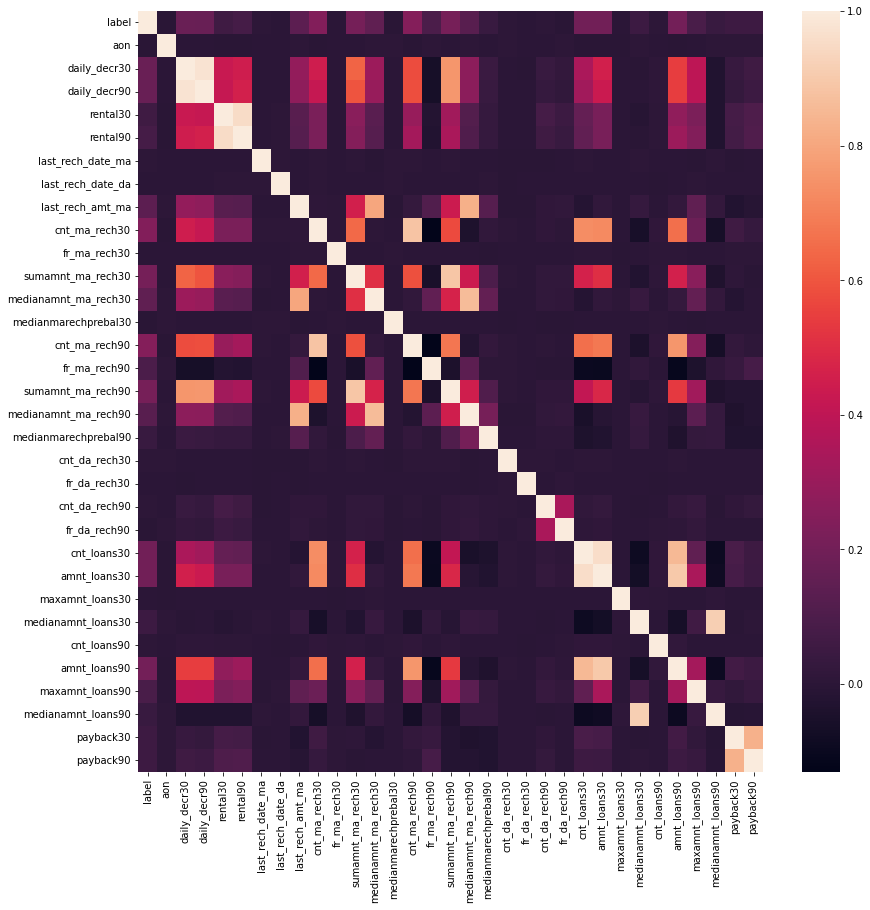

In [27]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr())

Key Observations :
* daily_decr30 and daily_decr90 are having good correlation to each others.
* In the similar way cnt_loans30 and amnt_loans30, payback30 and payback90 have good correlations.
* label has a better correlation with daily_decr30, amnt_loans90, cnt_loans30, cnt_ma_rech90 compared to other variables.
* Label has very poor correlation with few variables like cnt_loans90, fr_da_rech90, medianmarechprebal30 etc as we can observe in the above table and map

In [28]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30','payback30'],axis=1, inplace = True)

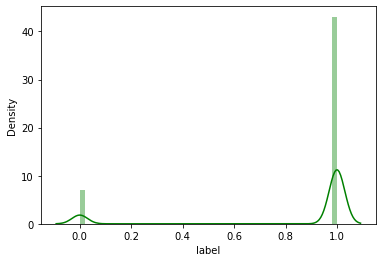

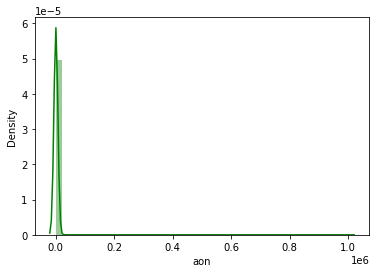

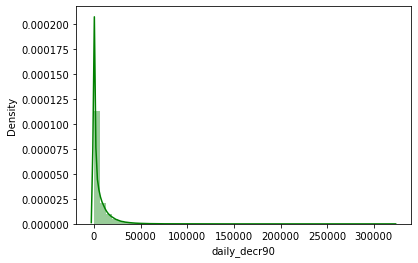

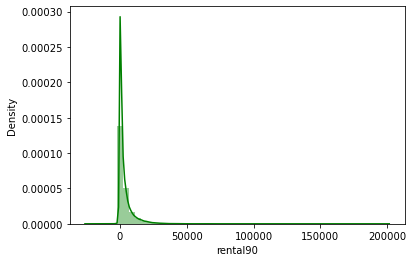

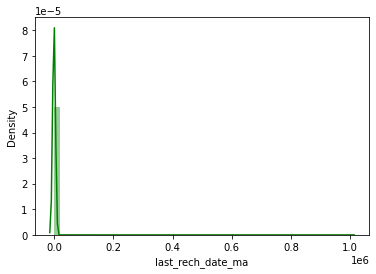

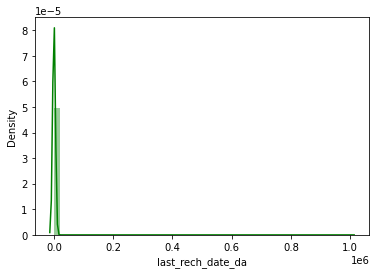

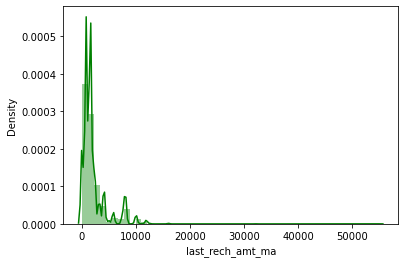

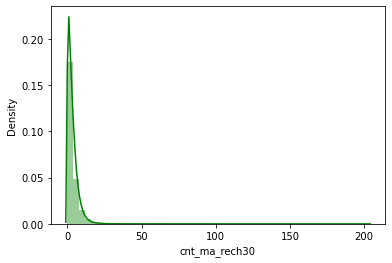

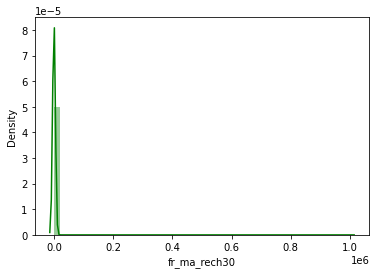

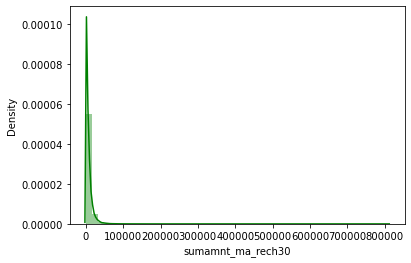

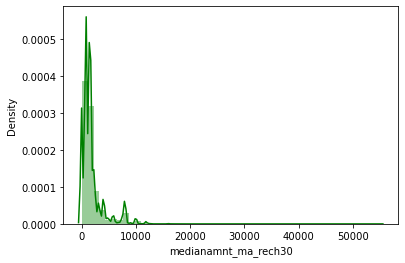

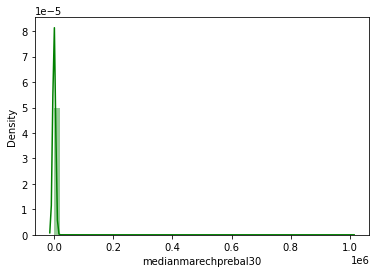

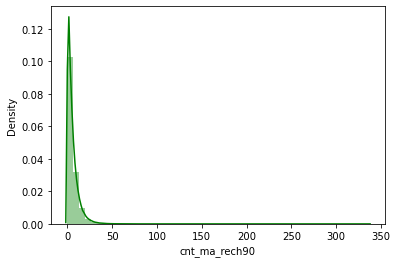

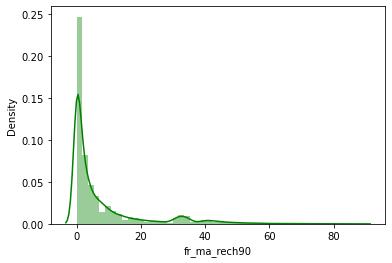

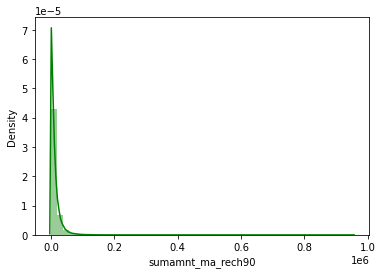

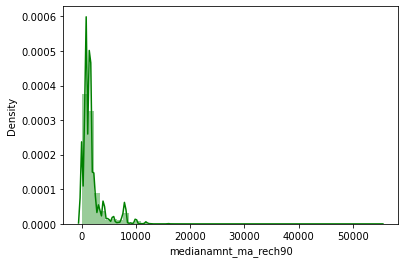

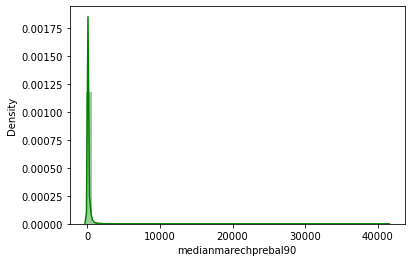

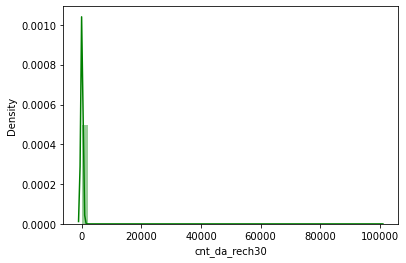

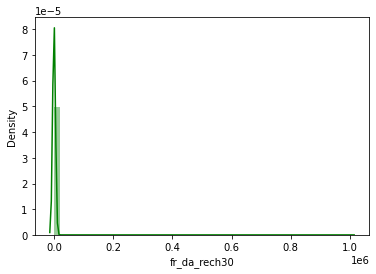

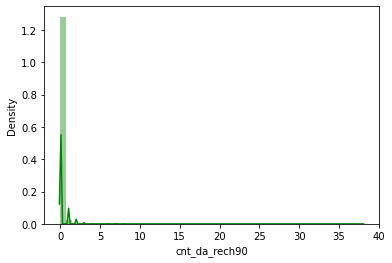

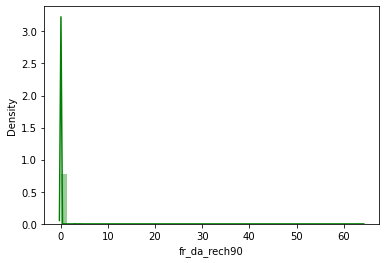

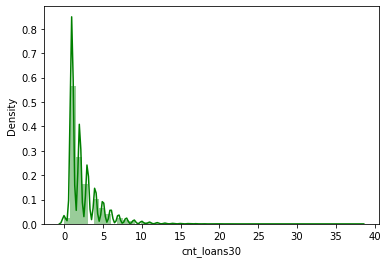

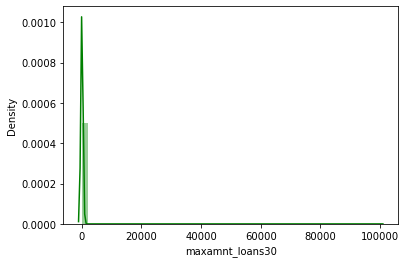

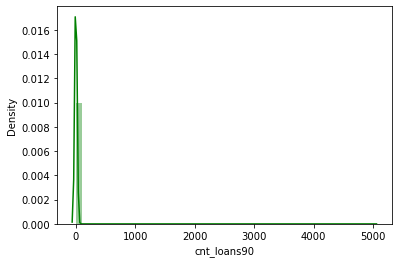

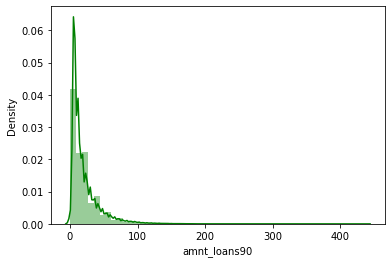

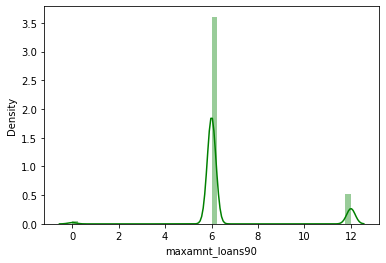

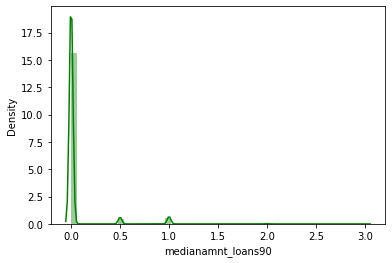

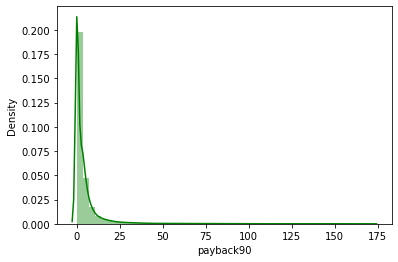

In [29]:
for col in df.columns:
    sns.distplot(df[col],color='g')
    plt.show()

From the above plots we can observe that all the columns are skewed on its right, the same we can observe in the below description

Hence skewness is removed from the data

label                      AxesSubplot(0.125,0.787927;0.133621x0.0920732)
aon                     AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
daily_decr90             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
rental90                AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
last_rech_date_ma       AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
last_rech_date_da          AxesSubplot(0.125,0.677439;0.133621x0.0920732)
last_rech_amt_ma        AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
cnt_ma_rech30            AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
fr_ma_rech30            AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
sumamnt_ma_rech30       AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
medianamnt_ma_rech30       AxesSubplot(0.125,0.566951;0.133621x0.0920732)
medianmarechprebal30    AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
cnt_ma_rech90            AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
fr_ma_rech90            AxesSubplot(0.

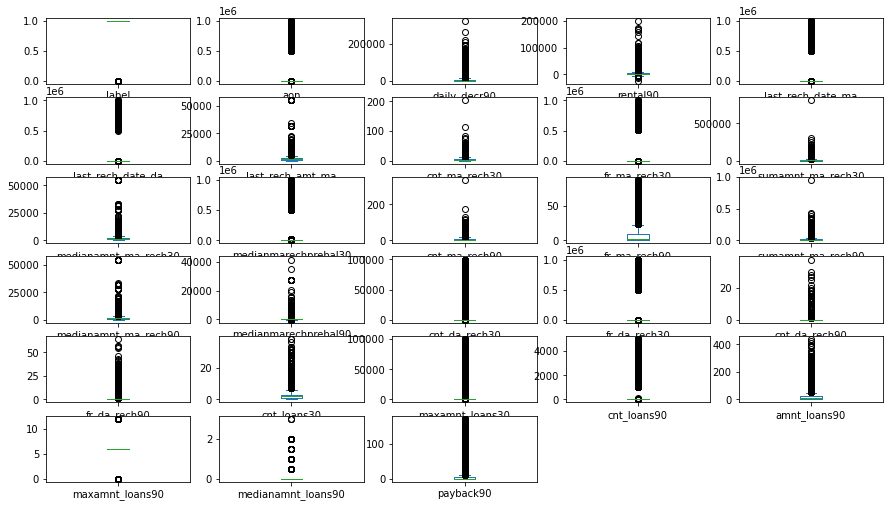

In [30]:
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(15,10))

In [31]:
outliers=['daily_decr90', 'rental90','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30','cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','maxamnt_loans30', 'cnt_loans90', 'amnt_loans90','medianamnt_loans90', 'payback90' ]

In [32]:
for col in outliers:
    from scipy.stats import zscore
    z=np.abs(zscore(df[col]))

In [33]:
Threshold=3
print(np.where(z>3))

(array([    22,     50,    212, ..., 185999, 186045, 186113], dtype=int64),)


In [34]:
df_new=df[(z<3)]
df_new

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,1,793.0,5356.210000,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,6.0,5.0,30,6,0.0,5.200000
209587,1,239.0,14704.900000,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12.0,3.0,24,12,1.0,30.000000
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,6.0,2.0,12,6,0.0,1.000000
209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,12.0,3.0,24,12,0.0,10.500000


In [35]:
df_new.shape

(182937, 28)

There are 182937 rows and 28 columns in dataset after removing outliers using zscore method

In [36]:
df.shape

(186243, 28)

There were 186243 rows and 28 columns in dataset before removing outliers

In [37]:
Dataloss = (((186243-182937)/182937)*100)
Dataloss

1.8071795208186425

We can observe that dataloss in zscore method after removing outliers of 1.8% which is less than 10% which tells it is approriate to delete it

In [38]:
df_new.skew()

label                   -2.091293
aon                     10.364726
daily_decr90             4.246573
rental90                 4.492543
last_rech_date_ma       14.893294
last_rech_date_da       14.815946
last_rech_amt_ma         3.829639
cnt_ma_rech30            3.453538
fr_ma_rech30            14.856388
sumamnt_ma_rech30        7.119346
medianamnt_ma_rech30     3.515662
medianmarechprebal30    14.691187
cnt_ma_rech90            3.532826
fr_ma_rech90             2.255917
sumamnt_ma_rech90        5.201298
medianamnt_ma_rech90     3.746827
medianmarechprebal90    43.544571
cnt_da_rech30           17.784849
fr_da_rech30            14.694850
cnt_da_rech90           28.826419
fr_da_rech90            28.915580
cnt_loans30              2.717448
maxamnt_loans30         17.721916
cnt_loans90             16.724540
amnt_loans90             3.138157
maxamnt_loans90          1.650315
medianamnt_loans90       4.799640
payback90                2.773828
dtype: float64

In [39]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [40]:
for col in df_new.skew().index:
    if col in df_new.columns:
        if df_new[col].skew()>0.55:
            df_new[col]=scaler.fit_transform(df_new[[col]].values)

In [41]:
x=df_new.drop(['label'],axis=1)
x.sample()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
34267,-0.253643,-0.343399,-0.379791,-0.11224,-0.075718,-2.051788,-1.646944,-1.088976,-1.847569,-1.896989,-0.063438,-1.746196,-1.176246,-1.973893,-2.068301,-0.389937,-0.141482,-0.086928,-0.1618,-0.0636,-0.845993,-0.0887,-0.970515,-0.943396,-0.275044,-0.25203,-0.953405


In [42]:
y=df_new['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209585    1
209587    1
209588    1
209591    1
209592    1
Name: label, Length: 182937, dtype: int64

In [43]:
y.shape,x.shape

((182937,), (182937, 27))

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [46]:
vif_calc()

    VIF Factor              Features
0     1.008229                   aon
1     2.389239          daily_decr90
2     1.317027              rental90
3     1.010885     last_rech_date_ma
4     1.053525     last_rech_date_da
5     6.628861      last_rech_amt_ma
6    54.941151         cnt_ma_rech30
7     1.968078          fr_ma_rech30
8    90.995425     sumamnt_ma_rech30
9    19.520529  medianamnt_ma_rech30
10    1.230565  medianmarechprebal30
11   57.804235         cnt_ma_rech90
12    1.852911          fr_ma_rech90
13   82.487816     sumamnt_ma_rech90
14   19.009701  medianamnt_ma_rech90
15    1.315274  medianmarechprebal90
16    1.839131         cnt_da_rech30
17    1.231929          fr_da_rech30
18    1.876680         cnt_da_rech90
19    1.468052          fr_da_rech90
20    9.241843           cnt_loans30
21    2.238974       maxamnt_loans30
22   19.068836           cnt_loans90
23   30.360572          amnt_loans90
24    3.295277       maxamnt_loans90
25    1.016842    medianamnt_loans90
2

From the above data we can observe that multicollinearity is still present in the dataset, As we can observe sumamnt_ma_rech30 and sumamnt_ma_rech90 are creating multicollinearity with the values 90.99 and 82.48 respectively. From correlation table we can see that sumamnt_ma_rech30 is having lesser contribution to label than sumamnt_ma_rech90, hence we can drop sumamnt_ma_rech30 now.

In [47]:
x.drop(['sumamnt_ma_rech30'],axis=1,inplace=True)
x.shape

(182937, 26)

In [48]:
vif_calc()

    VIF Factor              Features
0     1.008221                   aon
1     2.389227          daily_decr90
2     1.316281              rental90
3     1.010878     last_rech_date_ma
4     1.053492     last_rech_date_da
5     6.488953      last_rech_amt_ma
6    11.218256         cnt_ma_rech30
7     1.954204          fr_ma_rech30
8     4.874722  medianamnt_ma_rech30
9     1.230427  medianmarechprebal30
10   23.578233         cnt_ma_rech90
11    1.835984          fr_ma_rech90
12   24.350009     sumamnt_ma_rech90
13   11.000632  medianamnt_ma_rech90
14    1.315142  medianmarechprebal90
15    1.839058         cnt_da_rech30
16    1.231929          fr_da_rech30
17    1.876585         cnt_da_rech90
18    1.467990          fr_da_rech90
19    9.227652           cnt_loans30
20    2.238741       maxamnt_loans30
21   19.067432           cnt_loans90
22   30.360141          amnt_loans90
23    3.295108       maxamnt_loans90
24    1.016610    medianamnt_loans90
25    2.445459             payback90


There is multicollinearity present in the data as we can observe that sumamnt_ma_rech90 and amnt_loans90 are showing the higher vif values, from the correlation table the lesser contribution is given by amnt_loans90 compared to sumamnt_ma_rech90, hence we can drop amnt_loans90 at this stage

In [49]:
x.drop(['amnt_loans90'],axis=1,inplace=True)
x.shape

(182937, 25)

In [50]:
vif_calc()

    VIF Factor              Features
0     1.008182                   aon
1     2.347127          daily_decr90
2     1.314015              rental90
3     1.010844     last_rech_date_ma
4     1.053481     last_rech_date_da
5     6.477331      last_rech_amt_ma
6    10.836448         cnt_ma_rech30
7     1.952386          fr_ma_rech30
8     4.854660  medianamnt_ma_rech30
9     1.230340  medianmarechprebal30
10   22.897036         cnt_ma_rech90
11    1.828692          fr_ma_rech90
12   24.342937     sumamnt_ma_rech90
13   10.982513  medianamnt_ma_rech90
14    1.314662  medianmarechprebal90
15    1.839052         cnt_da_rech30
16    1.231929          fr_da_rech30
17    1.876529         cnt_da_rech90
18    1.467990          fr_da_rech90
19    7.147416           cnt_loans30
20    2.220239       maxamnt_loans30
21    7.943133           cnt_loans90
22    2.187217       maxamnt_loans90
23    1.016497    medianamnt_loans90
24    2.425350             payback90


We can again see that multicollinearity is caused between sumamnt_ma_rech90 and cnt_ma_rech90, from correlation data we can observe that sumamnt_ma_rech90 has lesser correlation with label than cnt_ma_rech90, hence we can drop sumamnt_ma_rech90 now 

In [51]:
x.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)
x.shape

(182937, 24)

In [52]:
vif_calc()

    VIF Factor              Features
0     1.007988                   aon
1     2.193998          daily_decr90
2     1.311653              rental90
3     1.010707     last_rech_date_ma
4     1.053473     last_rech_date_da
5     6.384574      last_rech_amt_ma
6    10.747443         cnt_ma_rech30
7     1.949069          fr_ma_rech30
8     4.771781  medianamnt_ma_rech30
9     1.230272  medianmarechprebal30
10   11.641783         cnt_ma_rech90
11    1.819256          fr_ma_rech90
12    7.714277  medianamnt_ma_rech90
13    1.310442  medianmarechprebal90
14    1.839018         cnt_da_rech30
15    1.231929          fr_da_rech30
16    1.876356         cnt_da_rech90
17    1.467990          fr_da_rech90
18    7.115104           cnt_loans30
19    2.214180       maxamnt_loans30
20    7.942862           cnt_loans90
21    2.155296       maxamnt_loans90
22    1.015985    medianamnt_loans90
23    2.384920             payback90


As there is multicollinearity caused between cnt_ma_rech90 and cnt_ma_rech30, from correlation data we can see that cnt_ma_rech30 has lesser correlation to label than cnt_ma_rech90, hence we can drop cnt_ma_rech30

In [53]:
x.drop(['cnt_ma_rech30'],axis=1,inplace=True)
x.shape

(182937, 23)

In [54]:
vif_calc()

    VIF Factor              Features
0     1.007982                   aon
1     2.105900          daily_decr90
2     1.308244              rental90
3     1.010247     last_rech_date_ma
4     1.053469     last_rech_date_da
5     6.328447      last_rech_amt_ma
6     1.897845          fr_ma_rech30
7     3.980325  medianamnt_ma_rech30
8     1.230253  medianmarechprebal30
9     3.009958         cnt_ma_rech90
10    1.754182          fr_ma_rech90
11    7.531451  medianamnt_ma_rech90
12    1.310441  medianmarechprebal90
13    1.838681         cnt_da_rech30
14    1.231928          fr_da_rech30
15    1.876350         cnt_da_rech90
16    1.467752          fr_da_rech90
17    5.898603           cnt_loans30
18    2.197014       maxamnt_loans30
19    7.262925           cnt_loans90
20    2.154631       maxamnt_loans90
21    1.015928    medianamnt_loans90
22    2.384481             payback90


Hence the multicollinearity is removed from the datset

In [55]:
#we can now scale the data using standard scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((137202, 23), (45735, 23), (137202,), (45735,))

In [58]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [59]:
model=[lg,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is : 
0.8746255602929922
[[ 1760  4572]
 [ 1162 38241]]
              precision    recall  f1-score   support

           0       0.60      0.28      0.38      6332
           1       0.89      0.97      0.93     39403

    accuracy                           0.87     45735
   macro avg       0.75      0.62      0.66     45735
weighted avg       0.85      0.87      0.85     45735



Accuracy score of  DecisionTreeClassifier() is : 
0.8519733245872964
[[ 3154  3178]
 [ 3592 35811]]
              precision    recall  f1-score   support

           0       0.47      0.50      0.48      6332
           1       0.92      0.91      0.91     39403

    accuracy                           0.85     45735
   macro avg       0.69      0.70      0.70     45735
weighted avg       0.86      0.85      0.85     45735



Accuracy score of  KNeighborsClassifier() is : 
0.8884224335847819
[[ 2708  3624]
 [ 1479 37924]]
              precision    recall  f1-score   su

From the above scores and matrix we can observe that Random Forest Classifier is giving the best score of 90.32%

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')

Score of :  LogisticRegression()
[87.44214861 87.43486025 87.35787172 87.29591837 87.43804665]
87.39376911801125
0.058056779385831855


Score of :  DecisionTreeClassifier()
[85.09893954 85.44149266 85.16034985 85.15306122 85.05466472]
85.18170160034838
0.13546622281994938


Score of :  KNeighborsClassifier()
[88.64837287 88.80871688 88.84110787 88.70626822 88.85204082]
88.77130133316506
0.08016539448675301


Score of :  RandomForestClassifier()
[90.16799679 90.4303779  90.32798834 90.41180758 90.41909621]
90.35145336461594
0.09864500950023988




Evening with cross validation we can observe that mean score is good for Random Forest Classifier model

In [62]:
# Parameter tuning for RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

In [63]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}

In [64]:
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)

In [65]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [66]:
grd.best_score_

0.9038789606176538

In [67]:
grd.best_params_

{'criterion': 'gini'}

We can observe that Randon Forest Classifier is giving the best score of 90.35% with criterion as gini, So we can finalize the model with the same parameters now

In [68]:
final_model=RandomForestClassifier(criterion='gini')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9036405378812725
[[ 2795  3537]
 [  870 38533]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      6332
           1       0.92      0.98      0.95     39403

    accuracy                           0.90     45735
   macro avg       0.84      0.71      0.75     45735
weighted avg       0.89      0.90      0.89     45735



In [69]:
# We can save the model now
import joblib
joblib.dump(final_model,'Micro_Credit_Defaulter.obj')

['Micro_Credit_Defaulter.obj']

Loading the saved model and predicting the values

In [70]:
Micro_Credit_Defaulter=joblib.load('Micro_Credit_Defaulter.obj')

In [71]:
pred=Micro_Credit_Defaulter.predict(x_test)
print("Predicted values :",pred)

Predicted values : [1 0 0 ... 1 1 1]


In [72]:
y_test

25388     1
97381     0
66932     0
100447    1
205069    1
         ..
132203    1
109769    1
139548    1
175620    1
83014     0
Name: label, Length: 45735, dtype: int64

In [73]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1

,Predicted values,Original values
25388,1,1
97381,0,0
66932,0,0
100447,1,1
205069,1,1
...,...,...
132203,1,1
109769,1,1
139548,1,1
175620,1,1
